In [1]:
from IPython.display import display, Math, Markdown, HTML

from math import *
import numpy as np
import pandas as pd
import scipy.stats
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = "dotted"
plt.rcParams["errorbar.capsize"] = 2
plt.rcParams["savefig.dpi"] = 200
# plt.rcParams["savefig.bbox"] = "tight"
# plt.rcParams["savefig.pad_inches"] = 0.01
plt.rcParams["savefig.format"] = "pdf"

# from uncertainties import unumpy as unp
from uncertainties import ufloat
from uncertainties.unumpy import uarray
from uncertainties.unumpy import nominal_values as unominal
from uncertainties.unumpy import std_devs as ustdev

def display_ufloat(uf, var=None, dim=None):
    res = ''
    if var is not None:
        res += var + '='
    res += f"{uf:L}"
    if dim is not None:
        res += ' \\ ' + dim
    display(Math(res))

# Диа- и парамагнетики

**Цель работы:** измерение магнитной восприимчивости диа- и парамаг­ нитного образцов.

**В работе используются:** электромагнит, аналитические весы, милливе­ берметр, регулируемый источник постоянного тока, образцы.

Магнитная восприимчивость тел может быть определена по изме­рению сил, действующих на тела в магнитном поле. В методе Гюи используется тонкий и длинный стержень, один из концов которого помещают в зазор электромагнита (обычно в область однородного поля), а другой конец — вне зазора, где величиной магнитного поля можно пренебречь. Нас интересует сила, действующая на образец со стороны магнитного поля
$$
F_M = \left(\frac{\partial W_M}{\partial x}\right)_I
$$

Магнитная энергия может быть рассчитана по формуле
$$
W_M = \frac{1}{2\mu_0}\int{\frac{B^2}{\mu}}dV
$$

Поскольку маг­нитная восприимчивость диа- и парамагнетиков мала $|\chi| \ll 1$, можно воспользоваться непрерывностью касательной компоненты $H$ и считать, что в образце $H_{ст} = H_0$ и, следовательно, $B_{ст} = \mu B_0$.

Найдём изменение магнитной энергии при заданном смещении

$$
dW_М(\Delta x) \approx \frac{B_{2}^2}{2\mu\mu_0} S\,dx -
\frac{B_{3}^2}{2\mu_0} S\,dx = (\mu-1)\frac{B_0^2}{2\mu_0} S\,dx.
$$

Следовательно, искомая сила равна
$$
F_М=\left(\frac{\partial W_М}{\partial x}\right)_{B_0}\approx \chi\frac{B_0^2}{2\mu_0} S.
$$
Знак силы зависит от знака восприимчивости $\chi=\mu-1$: парамагнетики
($\chi>0$) **втягиваются**
в~зазор электромагнита, а диамагнетики ($\chi<0$) **выталкиваются** из него
(напомним, что положительным по~$x$ мы считаем направление вглубь зазора).
Таким образом, измерив силу, действующую на образец в магнитном поле $B_0$,
можно рассчитать магнитную восприимчивость образца.


<center><b>I. Подготовка приборов к работе<b><center>

<center><b>II. Калибровка магнита<b><center>

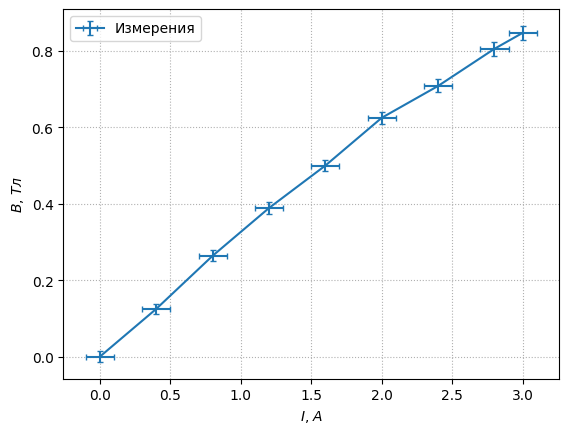

In [2]:
SN = ufloat(72, 1)  # см2

X = I_calib = uarray([0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 2.8, 3.0], 0.1)  # A
Phi_calib = uarray([0, 0.9, 1.9, 2.8, 3.6, 4.5, 5.1, 5.8, 6.1], 0.1)  # мВб
Y = B_calib = Phi_calib / SN * 10  # Тл (мВб / см2 = м(Вб / (м2 / 1e4)) = 1e4 мТл = 10 Тл)

plt.xlabel(r"$I$, $А$")
plt.ylabel(r"$B$, $Тл$")

plt.errorbar(unominal(X), unominal(Y), xerr=ustdev(X), yerr=ustdev(Y), label="Измерения")

plt.legend()
plt.show()

<center><b>III. Измерение сил, действующих на образец в магнитном поле<b><center>

In [3]:
I_Cu = uarray([0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 2.8, 3.0], 0.1)  # A
m_Cu_up = uarray([0,  -1,  -2,  -4,  -7, -11, -15, -19, -21], 1)  # мг
m_Cu_down = uarray([0,  -1,  -2,  -4,  -7, -11, -15, -19, -21], 1)  # мг

In [4]:
I_Al = uarray([0, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 2.8, 3.0], 0.1)  # A
m_Al_up = uarray([0, 1, 4, 10, 17, 25, 35, 45, 49], 1)  # мг
m_Al_down = uarray([0, 1, 5, 11, 17, 27, 37, 45, 49], 1)  # мг

<center><b>IV. Обработка результатов<b><center>

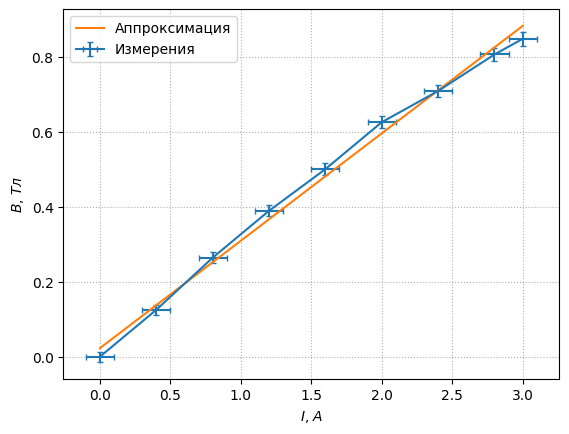

In [5]:
X = I_calib
Y = B_calib

plt.xlabel(r"$I$, $А$")
plt.ylabel(r"$B$, $Тл$")

plt.errorbar(unominal(X), unominal(Y), xerr=ustdev(X), yerr=ustdev(Y), label="Измерения")

func = lambda x, a, b: a * x + b
popt, pcov = curve_fit(func, unominal(X), unominal(Y), sigma=ustdev(Y))
perr = np.sqrt(np.diag(pcov))

a = ufloat(popt[0], perr[0])
b = ufloat(popt[1], perr[1])
B_calib_func = lambda x: func(x, a, b) - b
plt.plot(unominal(X), unominal(func(X, a, b)), label="Аппроксимация")

plt.legend()
plt.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

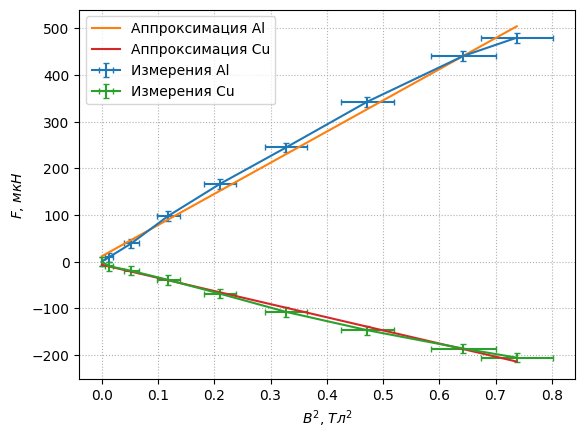

In [6]:
d_Cu = ufloat(1, 0.01)  # см
d_Al = ufloat(1, 0.01)  # см

def handle(I, m, s, name):
    g = ufloat(9.8, 0.1)  # м/с2
    Y = F = m * g  # мкН
    B = B_calib_func(I)
    X = B ** 2  # Тл2

    plt.xlabel(r"$B^2$, $Тл^2$")
    plt.ylabel(r"$F$, $мкН$")

    plt.errorbar(unominal(X), unominal(Y), xerr=ustdev(X), yerr=ustdev(Y), label=f"Измерения {name}")

    func = lambda x, a, b: a * x + b
    popt, pcov = curve_fit(func, unominal(X), unominal(Y), sigma=ustdev(Y))
    perr = np.sqrt(np.diag(pcov))

    a = ufloat(popt[0], perr[0])  # мкН / Тл2
    b = ufloat(popt[1], perr[1])
    plt.plot(unominal(X), unominal(func(X, a, b)), label=f"Аппроксимация {name}")

    # plt.legend()
    # plt.show()

    mu0 = 1.25663706212e-6  # Гн/м
    chi = a / (s / (2 * mu0)) / 1e6  # М мкН / (Тл2 * м2 / (Гн / м))
    # chi_specific = 
    display_ufloat(chi, rf"\chi_{{\text{{{name}}}}}")


handle(I_Al, m_Al_up, pi * (d_Al / 2 / 100) ** 2, "Al")
handle(I_Cu, m_Cu_up, pi * (d_Cu / 2 / 100) ** 2, "Cu")
plt.legend()
plt.show()

In [7]:
# https://en.wikipedia.org/wiki/Magnetic_susceptibility
display_ufloat(ufloat(2.2e-5, 0), rf"\chi_{{\text{{Al}}}}^{{табл.}}")
display_ufloat(ufloat(-9.63e-6, 0), rf"\chi_{{\text{{Cu}}}}^{{табл.}}")


<IPython.core.display.Math object>

<IPython.core.display.Math object>

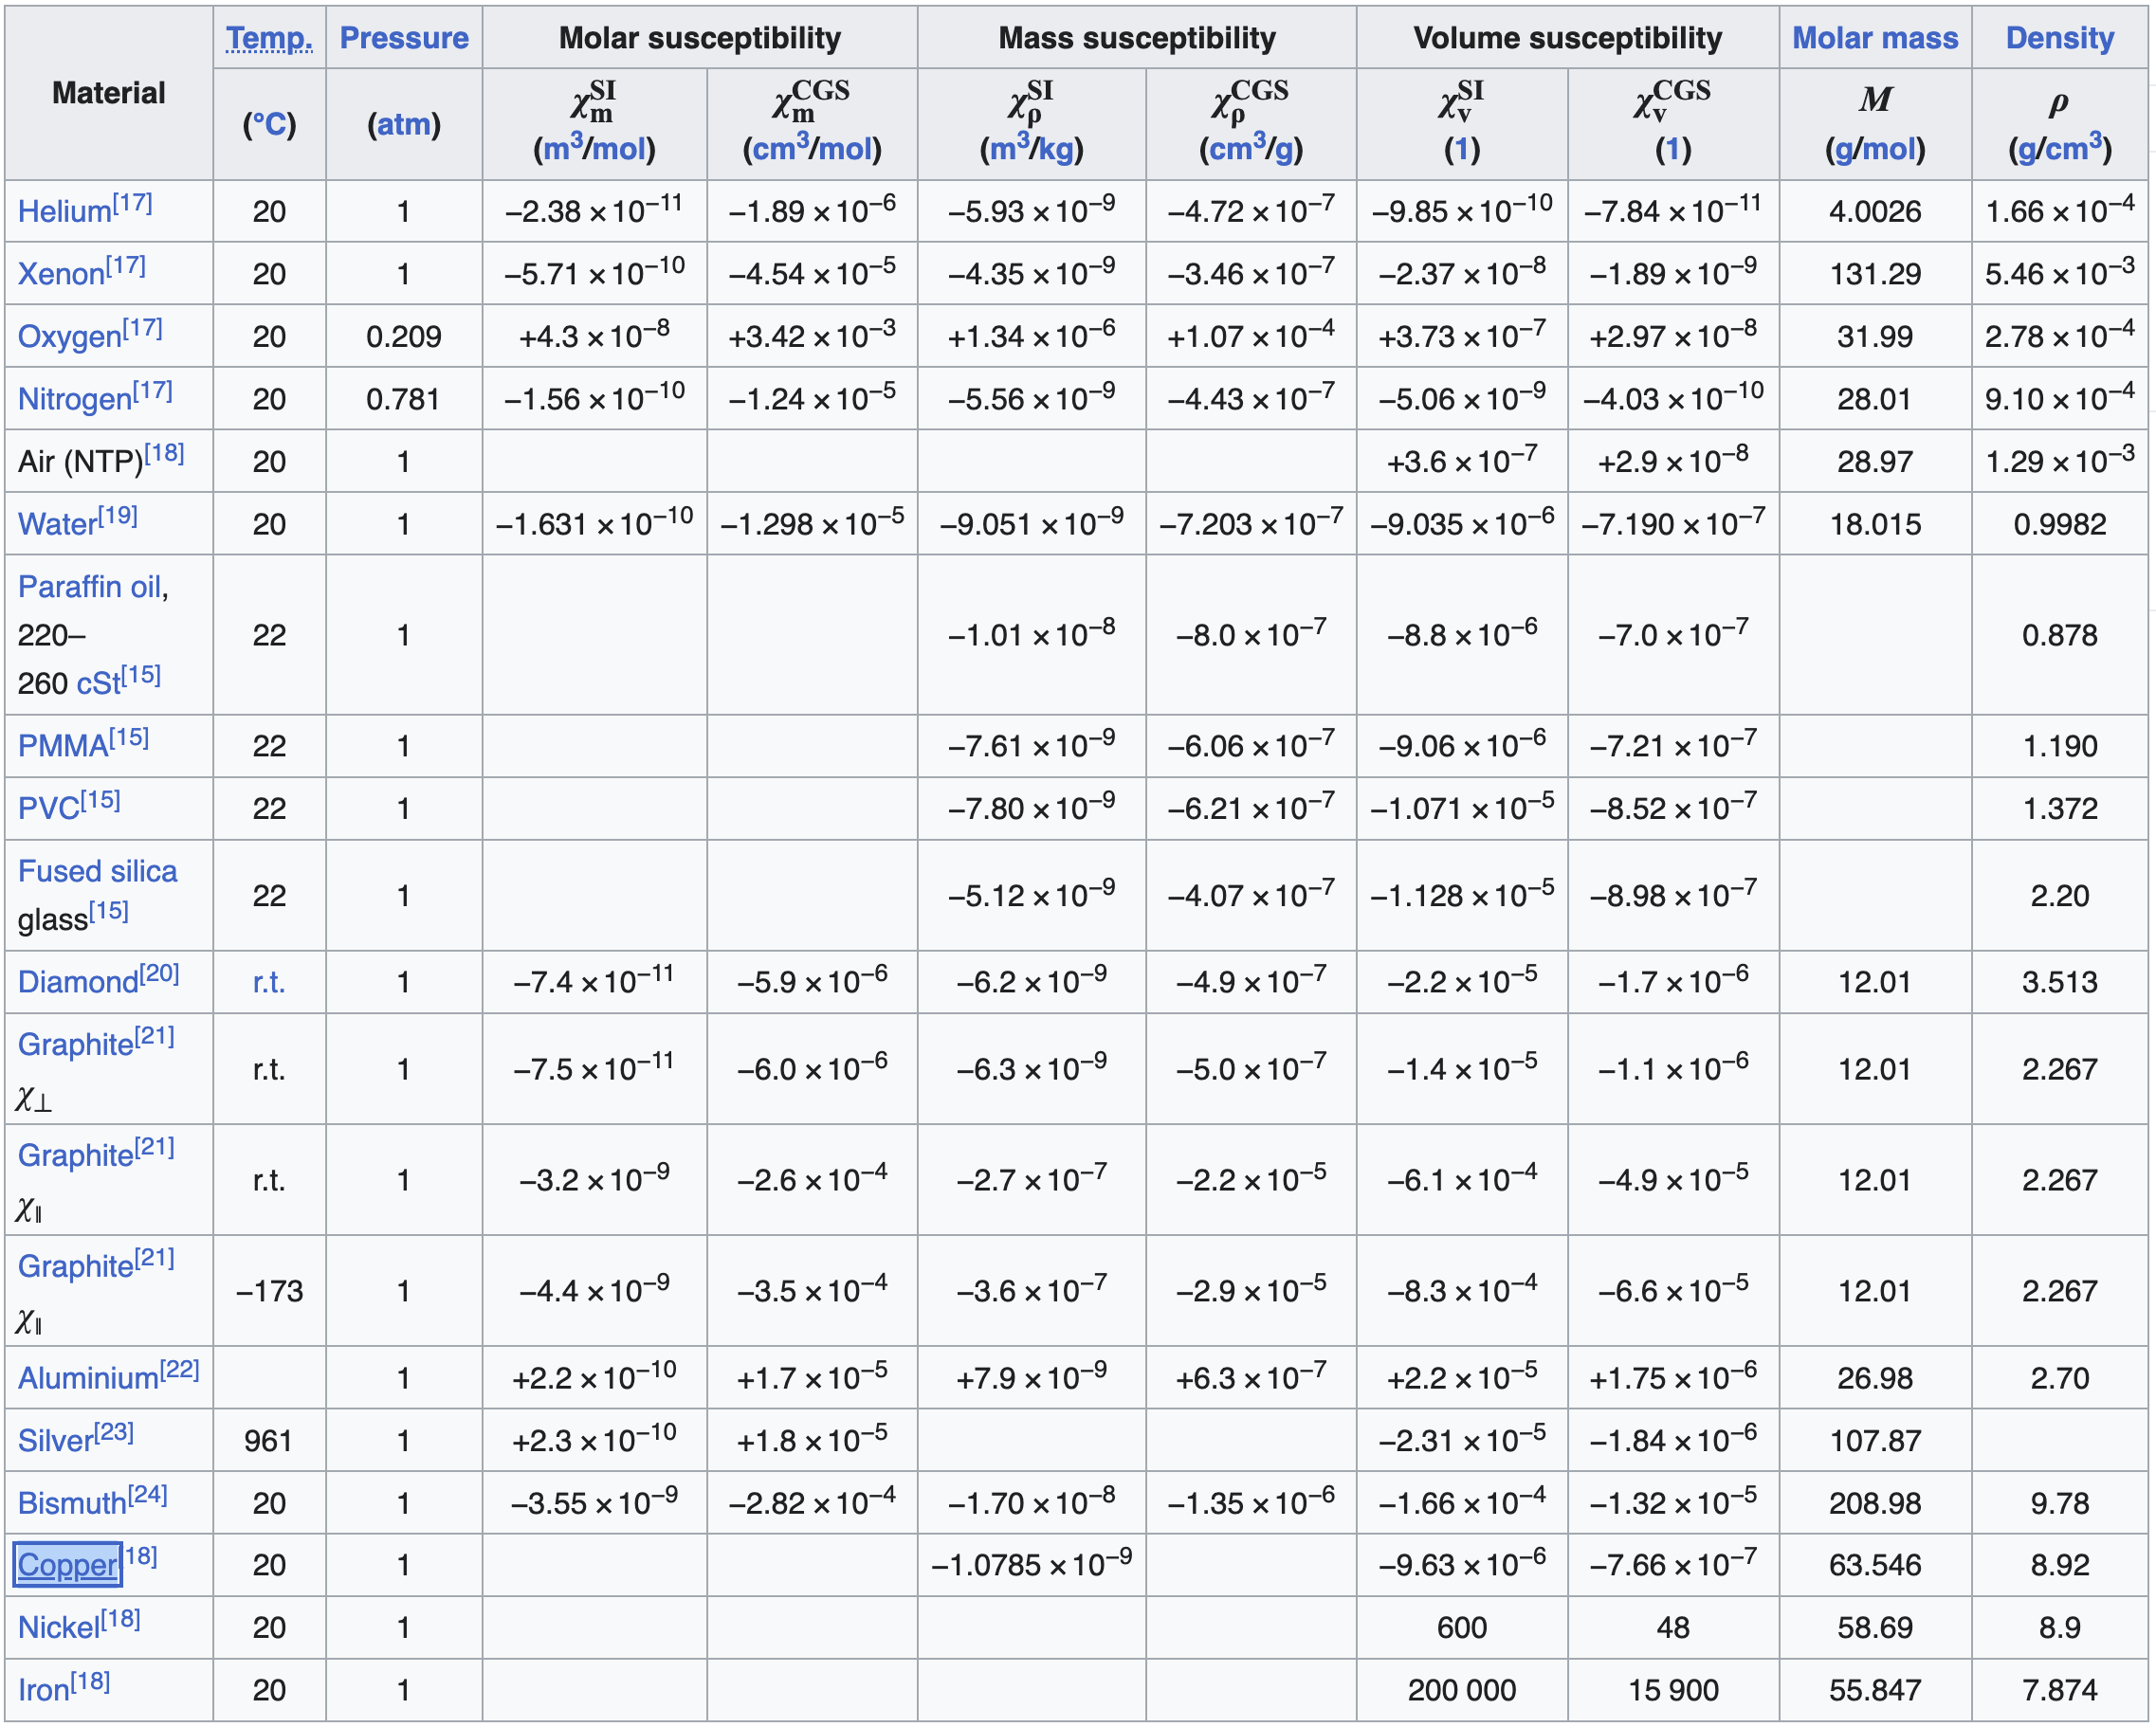

In [8]:
display_ufloat(ufloat(0.61e-9 * 2.6889 / 1e3 * 1e6, 0), rf"\chi_{{\text{{Al}}}}^{{табл.}}")
display_ufloat(ufloat(-0.086e-9 * 8.96 / 1e3 * 1e6, 0), rf"\chi_{{\text{{Cu}}}}^{{табл.}}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

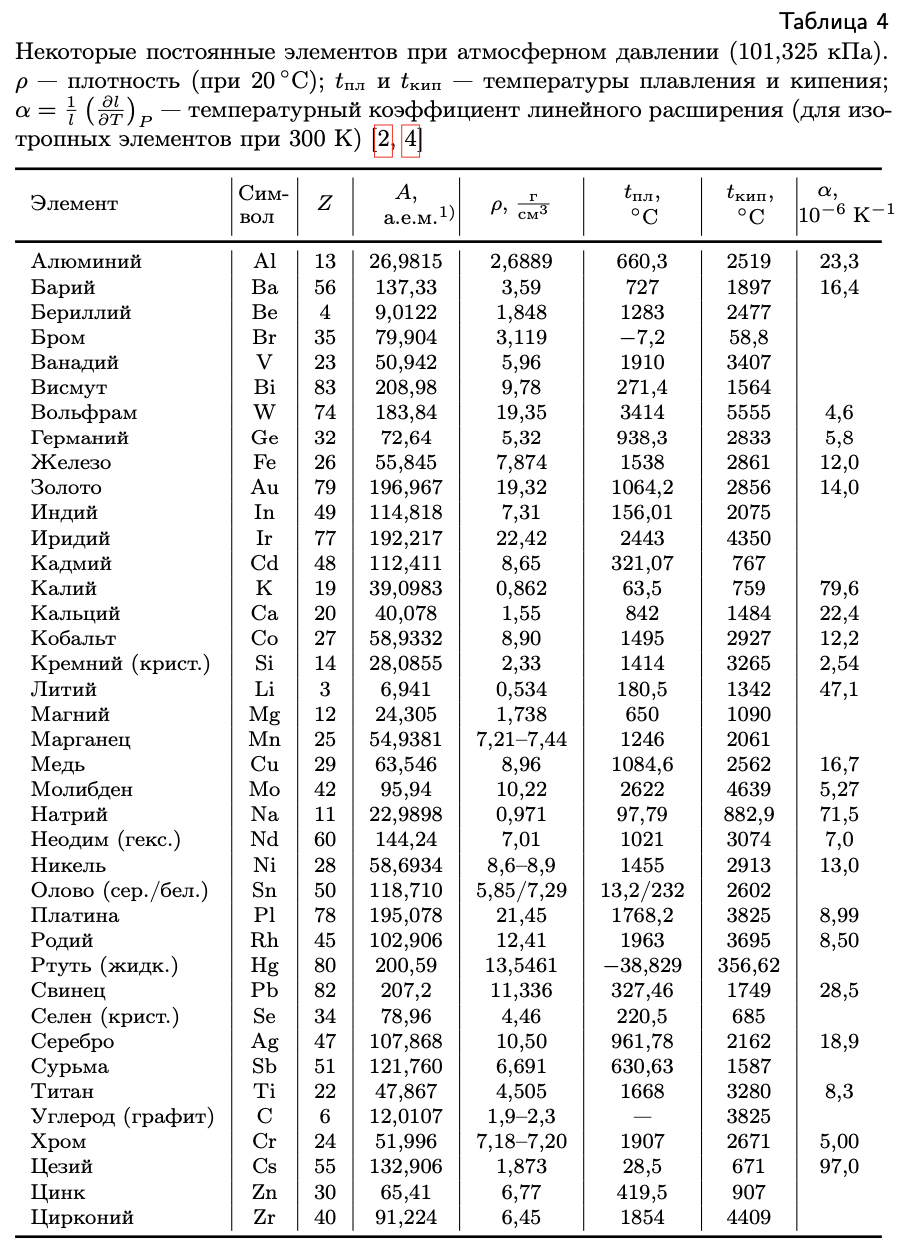

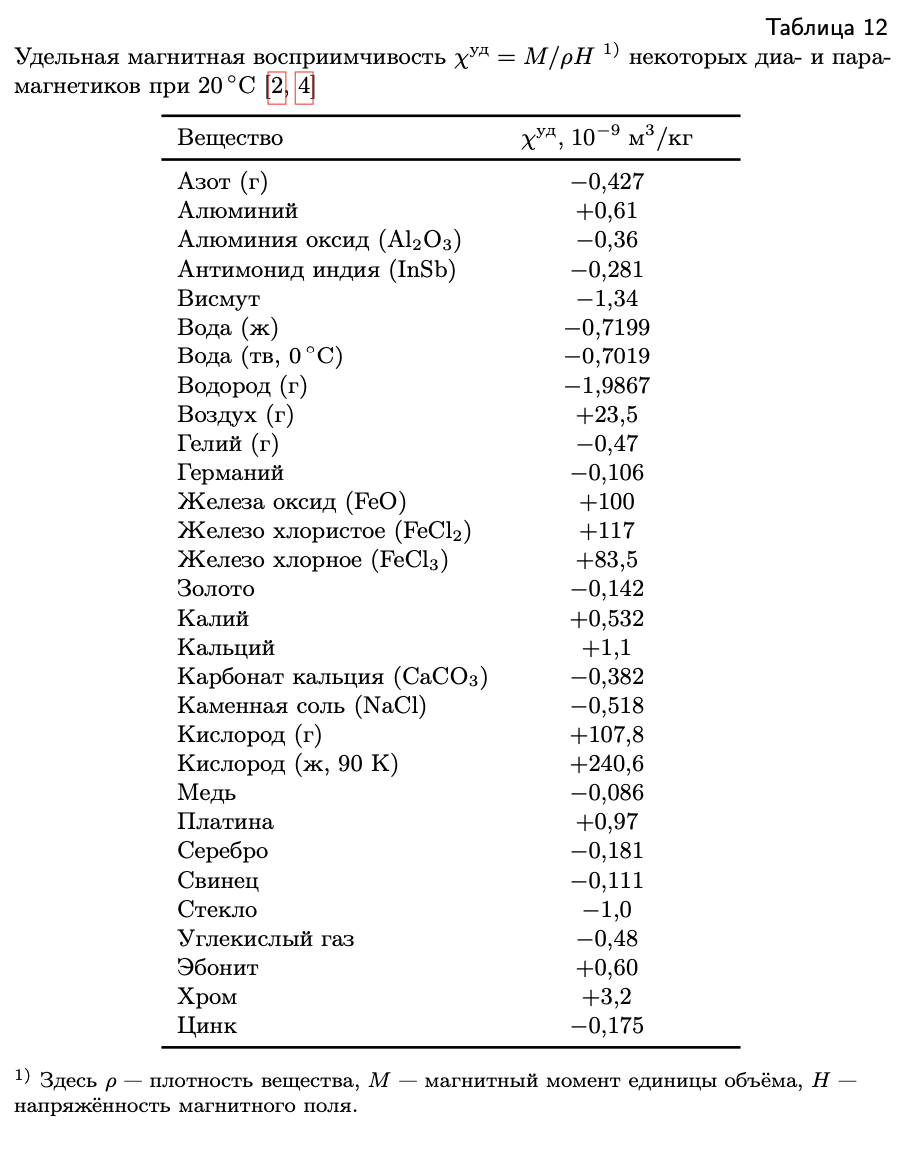